# Tutorial 1 Maximum Likelihood Estimation

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

In [13]:
Data=pd.read_csv('/content/drive/MyDrive/ID5055 assignments/Parameter Estimations/student-por_2.csv',sep=';')

In [14]:
Data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**Only G1 is column of interest**

In [15]:
d=Data['G1']

In [53]:
d.value_counts()

10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: G1, dtype: int64

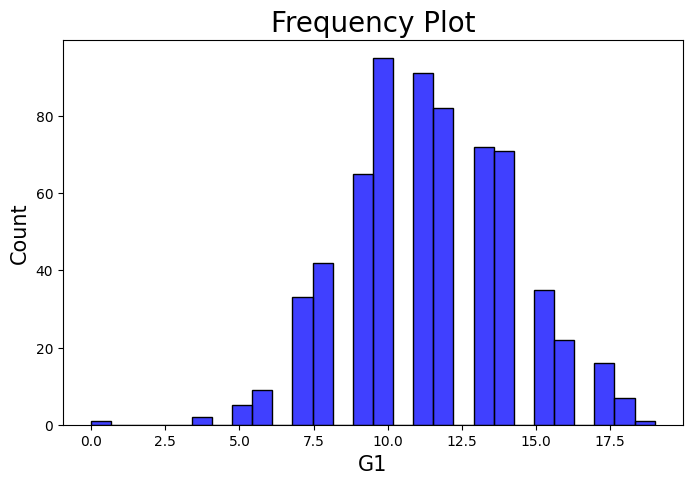

In [84]:
#Histogram plot
plt.figure(figsize=(8,5))
plt.title('Frequency Plot',fontsize=20)
sns.histplot(data=d, color ='blue')
plt.ylabel('Count',fontsize=15)
plt.xlabel('G1',fontsize=15)
plt.savefig('hist.png')
plt.show()

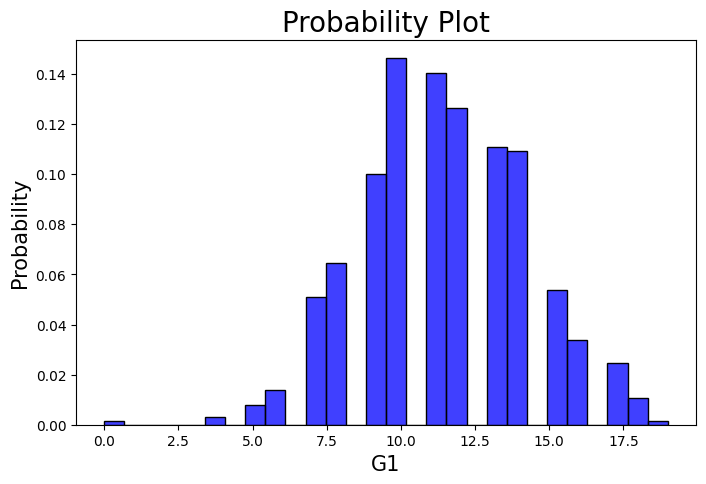

In [77]:
#Interms of probability i.e frequency/total number of frequency
plt.figure(figsize=(8,5))
plt.title('Probability Plot',fontsize=20)
sns.histplot(data=d, color ='blue',stat='probability')
plt.ylabel('Probability',fontsize=15)
plt.xlabel('G1',fontsize=15)
plt.show()

**The plot looks like near normal distribution (discarding the outliers) with mean very close to around 10**

A normal distribution is given as :

$f_X(x|[\mu,\sigma^{2}])\,\ = \,\ \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$

Where $\mu$ is Mean and $\sigma$ is Standard Deviation. Their formula for Maximum Likelihood estimators are :

$\hat{\mu}$ = $\frac{1}{N}\sum_{i=1}^{i=N}x_i$ and  

$\hat{\sigma^2}$ = $\frac{1}{N}\sum_{i=1}^{i=N}(x-\hat{\mu})^2$

In [18]:
#checking the mean from the formula above :
sum =np.sum(d)
Mean=sum/len(d)
Mean

11.399075500770415

In [ ]:
#checking the standard_dev from the formula above :
sum =np.sum(d)
Mean=sum/len(d)
Mean

So our guess matches very close

In [27]:
sum=np.sum((d-Mean)**2)
var=sum/len(d)
sigma=var**0.5
sigma

2.7431493168577212

# Using Numerical method from scipy library

In [34]:
def likelihood(param,data):#param[0] = mean, param[1] = std
  lam= param
  pdf = 1/(lam[1]*(2*np.pi)**0.5)*(np.exp(-((data-lam[0])**2)/(2*lam[1]**2)))
  pdf[pdf<=0]=np.finfo(float).eps
  log_li=np.log(pdf)
  return -np.sum(log_li)

In [40]:
for i in range(1,5):
  sol = minimize(likelihood,[i,i],d,method='L-BFGS-B')
  print("Guessing value is ",i)
  Mean=sol.x[0]
  Standard_dev=sol.x[1]
  print(f"ML estimate of Mean is {Mean}")
  print(f"Standard deviation is {Standard_dev}")

Guessing value is  1
ML estimate of Mean is 11.399075433041466
Standard deviation is 2.7431508601977663
Guessing value is  2
ML estimate of Mean is 11.399075572098688
Standard deviation is 2.7431503871424896
Guessing value is  3
ML estimate of Mean is 11.39907550831009
Standard deviation is 2.743149426185999
Guessing value is  4
ML estimate of Mean is 11.399076174912505
Standard deviation is 2.7431485881315623


So this verifies our guess. Using the computed mean and standard deviation lets generate a normal distribution plot
# Final quick sanity check

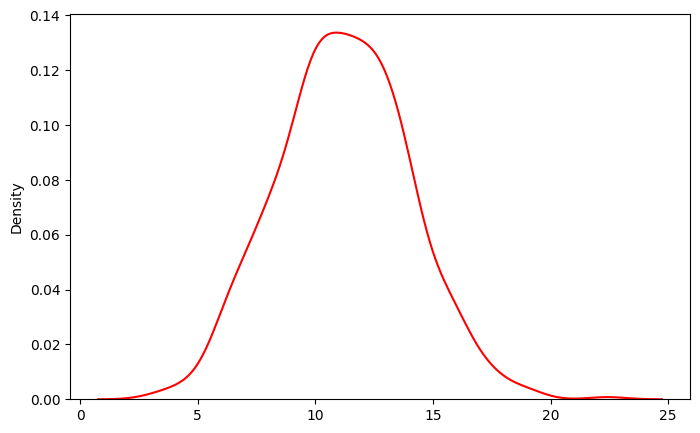

In [79]:
s = np.random.normal(Mean, Standard_dev, 649)
plt.figure(figsize=(8,5))
sns.kdeplot(s,color='red')
plt.show()

Now merging the density plot with the probability plot as given above

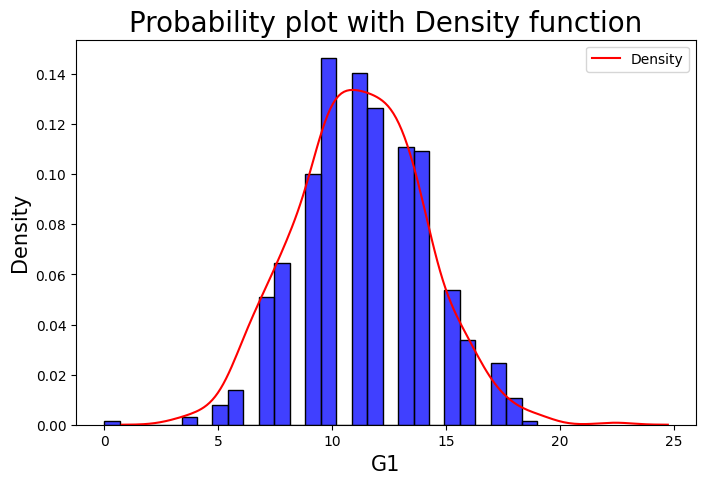

In [83]:
plt.figure(figsize=(8,5))
plt.title('Probability plot with Density function',fontsize=20)
sns.kdeplot(s,color='red',label='Density')
sns.histplot(data=d, color ='blue',stat='probability')
plt.ylabel('Density',fontsize=15)
plt.xlabel('G1',fontsize=15)
plt.legend()
plt.show()

So the PDF closely resembles the distribution of the data. So our ML estimators are correct. This brings to the end of our notebook. Hope this clearly demonstrates the working principle of Maximum Likelihood Estimators